In [1]:
# %matplotlib inline
import numpy as np
import scipy as sc
import matplotlib as mpl
import matplotlib.pyplot as plt

from utils import *

mpl.rcParams.update(rcParams)

In [2]:
%%bash
cd .. && make clean && make

In [3]:
config_name = 'varying'
conf = load_conf(config_name)

In [4]:
N_unif = np.geomspace(500, 5000, 50, dtype=int)
data_unif = run_with_params(
    config_name,
    gen_variations({
        'alpha': [1],
        'N': N_unif,
    }))

N_nonunif = np.sqrt(np.geomspace(500**2, 5000**2, 50)).astype(int)
data_nonunif = run_with_params(
    config_name,
    gen_variations({
        'alpha': [2],
        'N': N_nonunif,
    }))

Running simulations... Done 47/50

Running simulations... Done 50/50
Running simulations... Done 50/50


In [5]:
params_unif = []
temps_unif = []
heats_unif = []
for el in data_unif:
    params_unif.append(el[0])
    temps_unif.append(el[1][0][1])
    heats_unif.append(el[2][-1][1])
params_unif = np.array(params_unif)
temps_unif = np.array(temps_unif)
heats_unif = np.array(heats_unif)


params_nonunif = []
temps_nonunif = []
heats_nonunif = []
for el in data_nonunif:
    params_nonunif.append(el[0])
    temps_nonunif.append(el[1][0][1])
    heats_nonunif.append(el[2][-1][1])
params_nonunif = np.array(params_nonunif)
temps_nonunif = np.array(temps_nonunif)
heats_nonunif = np.array(heats_nonunif)

In [6]:
S0 = conf['S0']
r0 = conf['r0']
sigma = conf['sigma']
R = conf['R']

def dPtot(r):
    return 2*np.pi*r * S0*np.exp(-((r-r0)/sigma)**2)

Ptot = sc.integrate.quad(lambda r: dPtot(r), 0, R)[0]

In [7]:
flux_unif = 2*np.pi*R*heats_unif
error_energy_unif = np.abs(flux_unif - Ptot)

flux_nonunif = 2*np.pi*R*heats_nonunif
error_energy_nonunif = np.abs(flux_nonunif - Ptot)

# Plots!

valeur de T convergée 976.1630789123689 976.1605828649231


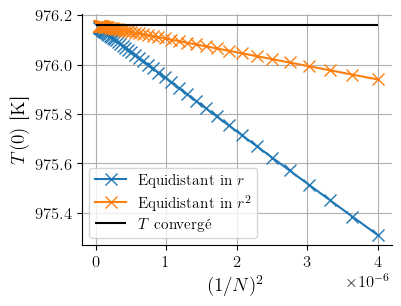

In [8]:
order = 2
conc_unif = temps_unif
conc_nonunif = temps_nonunif

plt.plot((1/N_unif)**order, conc_unif, 'x-', label=r'Equidistant in $r$')
plt.plot((1/N_nonunif)**order, conc_nonunif, 'x-', label=r'Equidistant in $r^2$')

coefs_unif = np.polyfit(1/N_unif, conc_unif, order)
T_conv_unif = coefs_unif[order]

coefs_nonunif = np.polyfit(1/N_nonunif, conc_nonunif, order)
T_conv_nonunif = coefs_nonunif[order]
print("valeur de T convergée", T_conv_unif, T_conv_nonunif)

plt.hlines([T_conv_nonunif], xmin = 0, xmax=4e-6, colors='black', label=r'$T$ convergé')

plt.xlabel(r'$(1/N)^2$')
plt.ylabel(r'$T(0)$ [K]')
plt.legend()
plt.grid(True, which="both")

valeurs de j convergée 5.3173605837374405 5.317362930739746


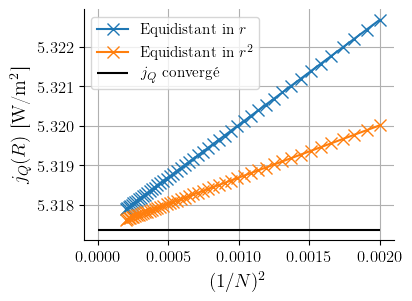

In [9]:
order = 1
conc_unif = heats_unif
conc_nonunif = heats_nonunif

plt.plot((1/N_unif)**order, conc_unif, 'x-', label=r'Equidistant in $r$')
plt.plot((1/N_nonunif)**order, conc_nonunif, 'x-', label=r'Equidistant in $r^2$')

coefs_unif = np.polyfit(1/N_unif, conc_unif, order)
j_conv_unif = coefs_unif[order]

coefs_nonunif = np.polyfit(1/N_nonunif, conc_nonunif, order)
j_conv_nonunif = coefs_nonunif[order]
print("valeurs de j convergée", j_conv_unif, j_conv_nonunif)

plt.hlines([j_conv_nonunif], xmin = 0, xmax=0.002, colors='black', label=r'$j_Q$ convergé')

plt.xlabel(r'$(1/N)^2$')
plt.ylabel(r'$j_Q(R)$ [W/m$^2$]')
plt.legend()
plt.grid(True, which="both")

In [10]:
flux_reel =  2*np.pi*R*j_conv_nonunif
print(flux_reel, Ptot)

print(f'Erreure finale convergée sur balance énergie: {np.abs(flux_reel - Ptot)}')

1.6704988319682677 1.6704983773337683
Erreure finale convergée sur balance énergie: 4.5463449938054623e-07


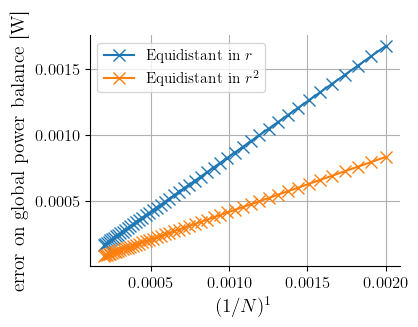

In [11]:
order = 1
conc_unif = error_energy_unif
conc_nonunif = error_energy_nonunif

plt.plot((1/N_unif)**order, conc_unif, 'x-', label=r'Equidistant in $r$')
plt.plot((1/N_nonunif)**order, conc_nonunif, 'x-', label=r'Equidistant in $r^2$')

# coefs_unif = np.polyfit(1/N_unif, conc_unif, order)
# T_conv_unif = coefs_unif[order]

# coefs_nonunif = np.polyfit(1/N_nonunif, conc_nonunif, order)
# T_conv_nonunif = coefs_nonunif[order]
# print(T_conv_unif, T_conv_nonunif)

# plt.hlines([T_conv_nonunif], xmin = 0, xmax=4e-6, colors='black', label=r'erreur convergée')

plt.xlabel(r'$(1/N)^1$')
plt.ylabel(r'error on global power balance [W]')
plt.legend()
plt.grid(True, which="both")

## Stolen to myself

In [12]:
# print(data_nonunif_heat[-1,1])
# Gamma_unif = 2*np.pi*R * data_unif_heat[-1,1]
# Gamma_nonunif = 2*np.pi*R * data_nonunif_heat[-1,1]

# print(f'Ptot = {Ptot} \nGamma_unif = {Gamma_unif} \nDiff = {np.abs(Ptot-Gamma_unif)}')
# print(f'\nPtot = {Ptot} \nGamma_nonunif = {Gamma_nonunif} \nDiff = {np.abs(Ptot-Gamma_nonunif)}')

In [13]:
# plt.plot(data_precise[:,0], data_precise[:,1], label=r'Equidistant in $r^2$')

# plt.xlabel(r'$r$ [m]')
# plt.ylabel(r'$T$ [K]')
# plt.legend()
# plt.grid()

In [14]:
# plt.plot(data_precise_heat[:,0], data_precise_heat[:,1], label=r'Equidistant in $r^2$')

# plt.xlabel(r'$r$ [m]')
# plt.ylabel(r'$j_Q$ [W/m²]')
# plt.legend()
# plt.grid()

In [15]:
# print(data_precise_heat[-1,1])
# Gamma = 2*np.pi*R * data_precise_heat[-1,1]

# print(f'Ptot = {Ptot} \nGamma = {Gamma} \nDiff = {np.abs(Ptot-Gamma)}')